In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [2]:
# Load the California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h3>5a Number of Non-Zero Coefficients vs. Lambda</h3>

In [3]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lambda_values = np.logspace(0, -2, 100)
nonzero_coeffs = []

# Initialize weights
w = np.zeros(X_train.shape[1])



In [4]:
for alpha in lambda_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    w = lasso.coef_
    nonzero_coeffs.append(np.sum(w != 0))

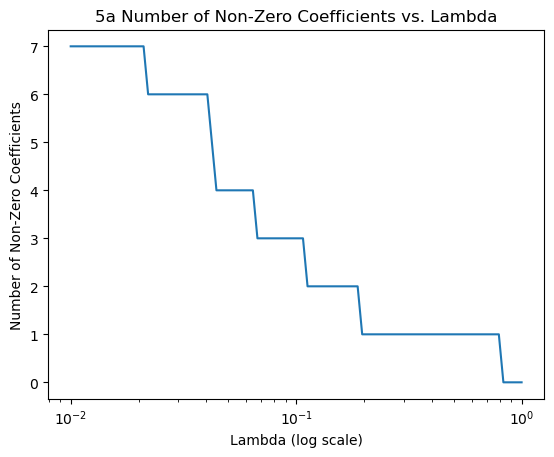

In [6]:
# 5a Plot the number of nonzero coefficients vs. lambda
plt.figure()
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Number of Non-Zero Coefficients')
plt.plot(lambda_values, nonzero_coeffs)
plt.title('5a Number of Non-Zero Coefficients vs. Lambda')

<h3>5b Regularization Paths for Coefficients</h3>

In [8]:
coefficients = []

for alpha in lambda_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    w = lasso.coef_
    coefficients.append(w)

Text(0.5, 1.0, '5b Regularization Paths for Coefficients')

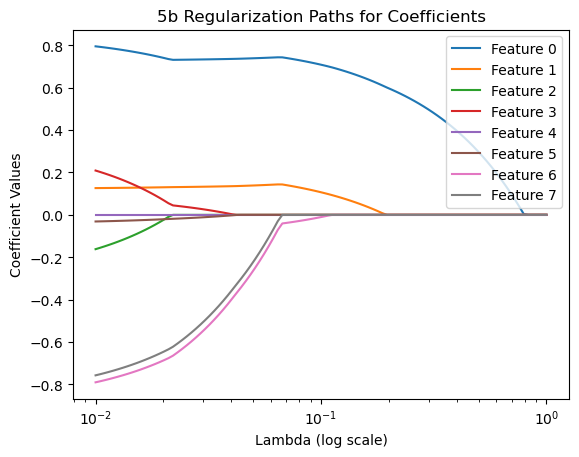

In [13]:
# 5b Plot the regularization paths for all input variables
plt.figure()
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Coefficient Values')

for i in range(X_train.shape[1]):
    plt.plot(lambda_values, [w[i] for w in coefficients], label=f'Feature {i}')
plt.legend(loc='upper right')
plt.title('5b Regularization Paths for Coefficients')

<h3>5c Squared Error vs. Lambda</h3>

In [11]:
from sklearn.metrics import mean_squared_error

train_errors = []
test_errors = []

for alpha in lambda_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

Text(0.5, 1.0, '5c Squared Error vs. Lambda')

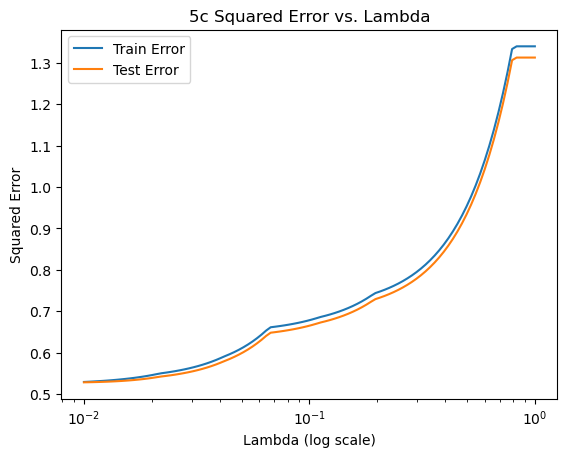

In [14]:
# 5c Plot the squared error on training and test data vs. lambda
plt.figure()
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Squared Error')
plt.plot(lambda_values, train_errors, label='Train Error')
plt.plot(lambda_values, test_errors, label='Test Error')
plt.legend()
plt.title('5c Squared Error vs. Lambda')

<h3>5d Squared Error vs. Lambda</h3>

In [24]:
from sklearn.linear_model import Lasso

# Fit the Lasso model with lambda = 100
lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)

coefficients_100 = lasso.coef_

# Find the feature with the largest (most positive) Lasso coefficient
max_positive_feature = np.argmax(coefficients_100)
max_positive_coefficient = coefficients_100[max_positive_feature]

# Find the feature with the most negative Lasso coefficient
max_negative_feature = np.argmin(coefficients_100)
max_negative_coefficient = coefficients_100[max_negative_feature]

print(f"Feature with the largest positive coefficient: Feature {max_positive_feature}, Coefficient: {max_positive_coefficient}")
print(f"Feature with the most negative coefficient: Feature {max_negative_feature}, Coefficient: {max_negative_coefficient}")

Feature with the largest positive coefficient: Feature 0, Coefficient: 0.0
Feature with the most negative coefficient: Feature 0, Coefficient: 0.0


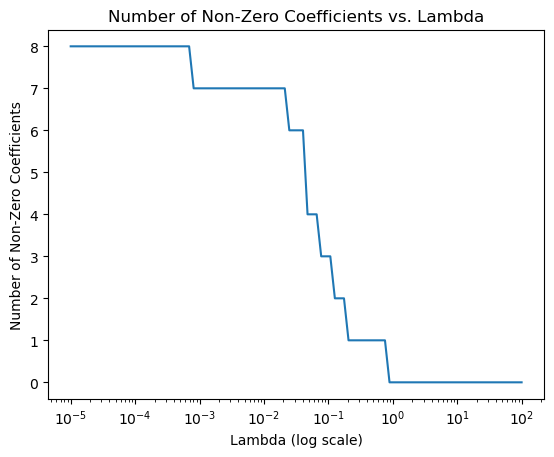

In [25]:
lambda_values = np.logspace(-5, 2, 100)

non_zero_features = []

for alpha in lambda_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    non_zero_count = np.sum(lasso.coef_ != 0)
    non_zero_features.append(non_zero_count)

# Plot the number of non-zero coefficients vs. lambda
plt.figure()
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Number of Non-Zero Coefficients')
plt.plot(lambda_values, non_zero_features)
plt.title('Number of Non-Zero Coefficients vs. Lambda')
plt.show()

<h3>5e Plot the average validation error with standard errors and Optimal Lambda</h3>

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statistics

In [17]:
# Define a range of lambda values)
lambda_values = np.logspace(np.log10(0.5), np.log10(1e4), 100)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

average_errors = []
standard_errors = []

In [18]:
for alpha in lambda_values:
    errors = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train_fold, y_train_fold)
        y_val_pred = lasso.predict(X_val_fold)
        error = mean_squared_error(y_val_fold, y_val_pred)
        errors.append(error)

    average_error = np.mean(errors)
    standard_error = statistics.stdev(errors)
    average_errors.append(average_error)
    standard_errors.append(standard_error)

Text(0.5, 1.0, '5e Average Validation Error with Standard Errors')

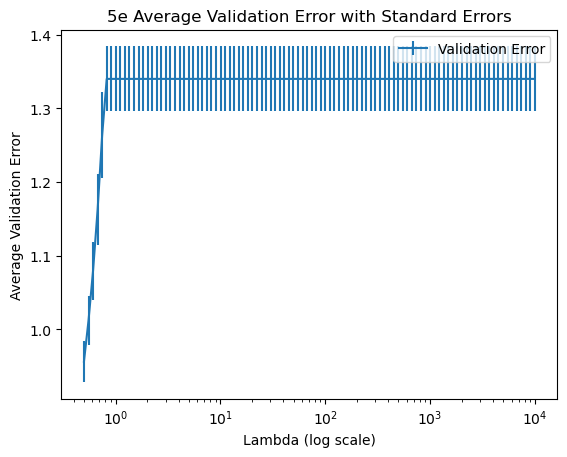

In [22]:
# 5e Plot the average validation error with standard errors
plt.figure()
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Average Validation Error')
plt.errorbar(lambda_values, average_errors, yerr=standard_errors, label='Validation Error')
plt.legend()
plt.title('5e Average Validation Error with Standard Errors')

In [21]:
# Optimal lambda
optimal_lambda = lambda_values[np.argmin(average_errors)]
print(f"Optimal lambda according to cross-validation: {optimal_lambda}")

Optimal lambda according to cross-validation: 0.5
